In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy.linalg as la
import math

# Part 1 Legendre Expansions


### Write a Subroutine For Eval_Legendere

In [12]:
def eval_legendre(n, x):
    p = np.zeros(n+1)
    p[0] = 1
    if n > 0:
        p[1] = x
    for k in range(1, n):
        p[k+1] = ((2*k + 1) * x * p[k] - k * p[k-1]) / (k + 1)
    return p


In [9]:
print(eval_legendre(10, -1))

[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.]


### Compute A_j

In [6]:
def compute_aj(f, phi_j, w, a, b):
    return quad(lambda x: f(x) * phi_j(x) * w(x), a, b)[0] / quad(lambda x: phi_j(x)**2 * w(x), a, b)[0]

### Legendre Expansion

In [10]:
# Function to evaluate the Legendre expansion
def eval_legendre_expansion(f, a, b, w, n, x):
    p = eval_legendre(n, x)  # Compute Legendre polynomials at x
    pval = 0.0  # Initialize sum
    
    for j in range(n+1):
        phi_j = lambda x: eval_legendre(j, x)[j]  # Get j-th Legendre polynomial
        aj = compute_aj(f, phi_j, w, a, b)  # Compute coefficient
        pval += aj * p[j]  # Accumulate expansion

    return pval

### Test Function $f(x)=e^{x}$ 

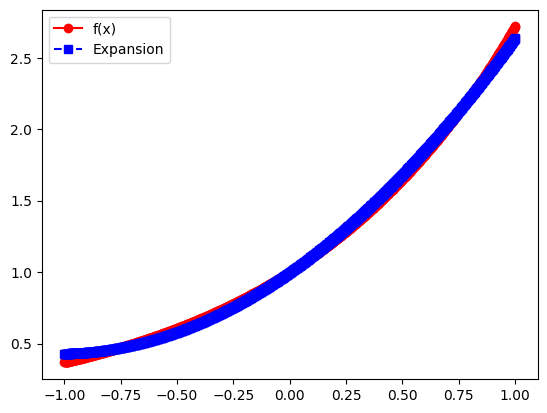

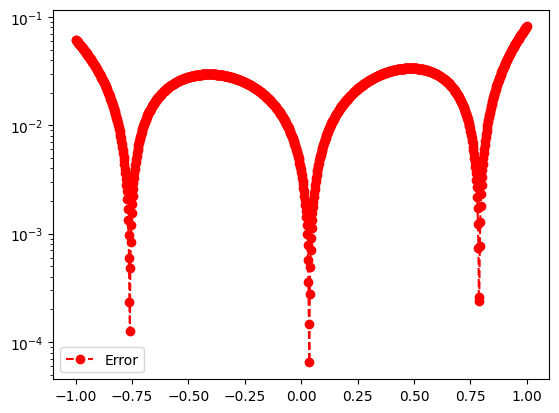

In [11]:
f = lambda x: math.exp(x)

# Interval of interest
a, b = -1, 1

# Weight function
w = lambda x: 1.0

# Order of approximation
n = 2

# Number of sample points
N = 1000
xeval = np.linspace(a, b, N+1)
pval = np.zeros(N+1)

for kk in range(N+1):
    pval[kk] = eval_legendre_expansion(f, a, b, w, n, xeval[kk])

# Compute exact values
fex = np.array([f(x) for x in xeval])

# Plot results
plt.figure()
plt.plot(xeval, fex, 'ro-', label='f(x)')
plt.plot(xeval, pval, 'bs--', label='Expansion')
plt.legend()
plt.show()

# Compute and plot error
err = np.abs(pval - fex)
plt.semilogy(xeval, err, 'ro--', label='Error')
plt.legend()
plt.show()

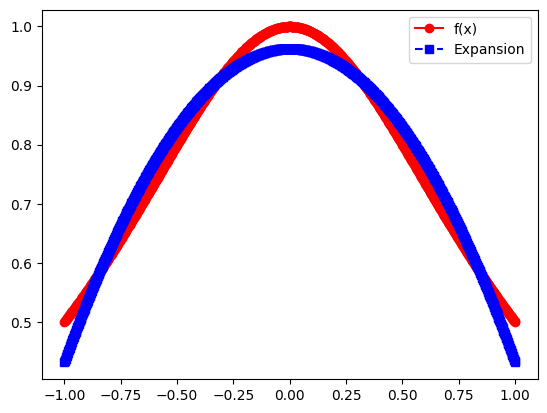

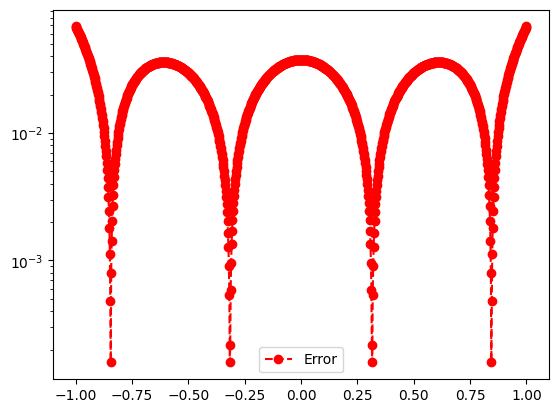

In [13]:
f = lambda x: 1/(1+x**2)

# Interval of interest
a, b = -1, 1

# Weight function
w = lambda x: 1.0

# Order of approximation
n = 2

# Number of sample points
N = 1000
xeval = np.linspace(a, b, N+1)
pval = np.zeros(N+1)

for kk in range(N+1):
    pval[kk] = eval_legendre_expansion(f, a, b, w, n, xeval[kk])

# Compute exact values
fex = np.array([f(x) for x in xeval])

# Plot results
plt.figure()
plt.plot(xeval, fex, 'ro-', label='f(x)')
plt.plot(xeval, pval, 'bs--', label='Expansion')
plt.legend()
plt.show()

# Compute and plot error
err = np.abs(pval - fex)
plt.semilogy(xeval, err, 'ro--', label='Error')
plt.legend()
plt.show()

The Error Rates and convergence are similar for both $e^x$ and $\frac{1}{1+x^{2}}$